In [1]:
import scipy

In [2]:
!pip install python_speech_features

  Using cached python_speech_features-0.6-py3-none-any.whl


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import wave, sys
import librosa
from scipy.spatial.distance import cosine
from python_speech_features import mfcc

# Load the two audio files as mono audio
import soundfile as sf

module://matplotlib_inline.backend_inline


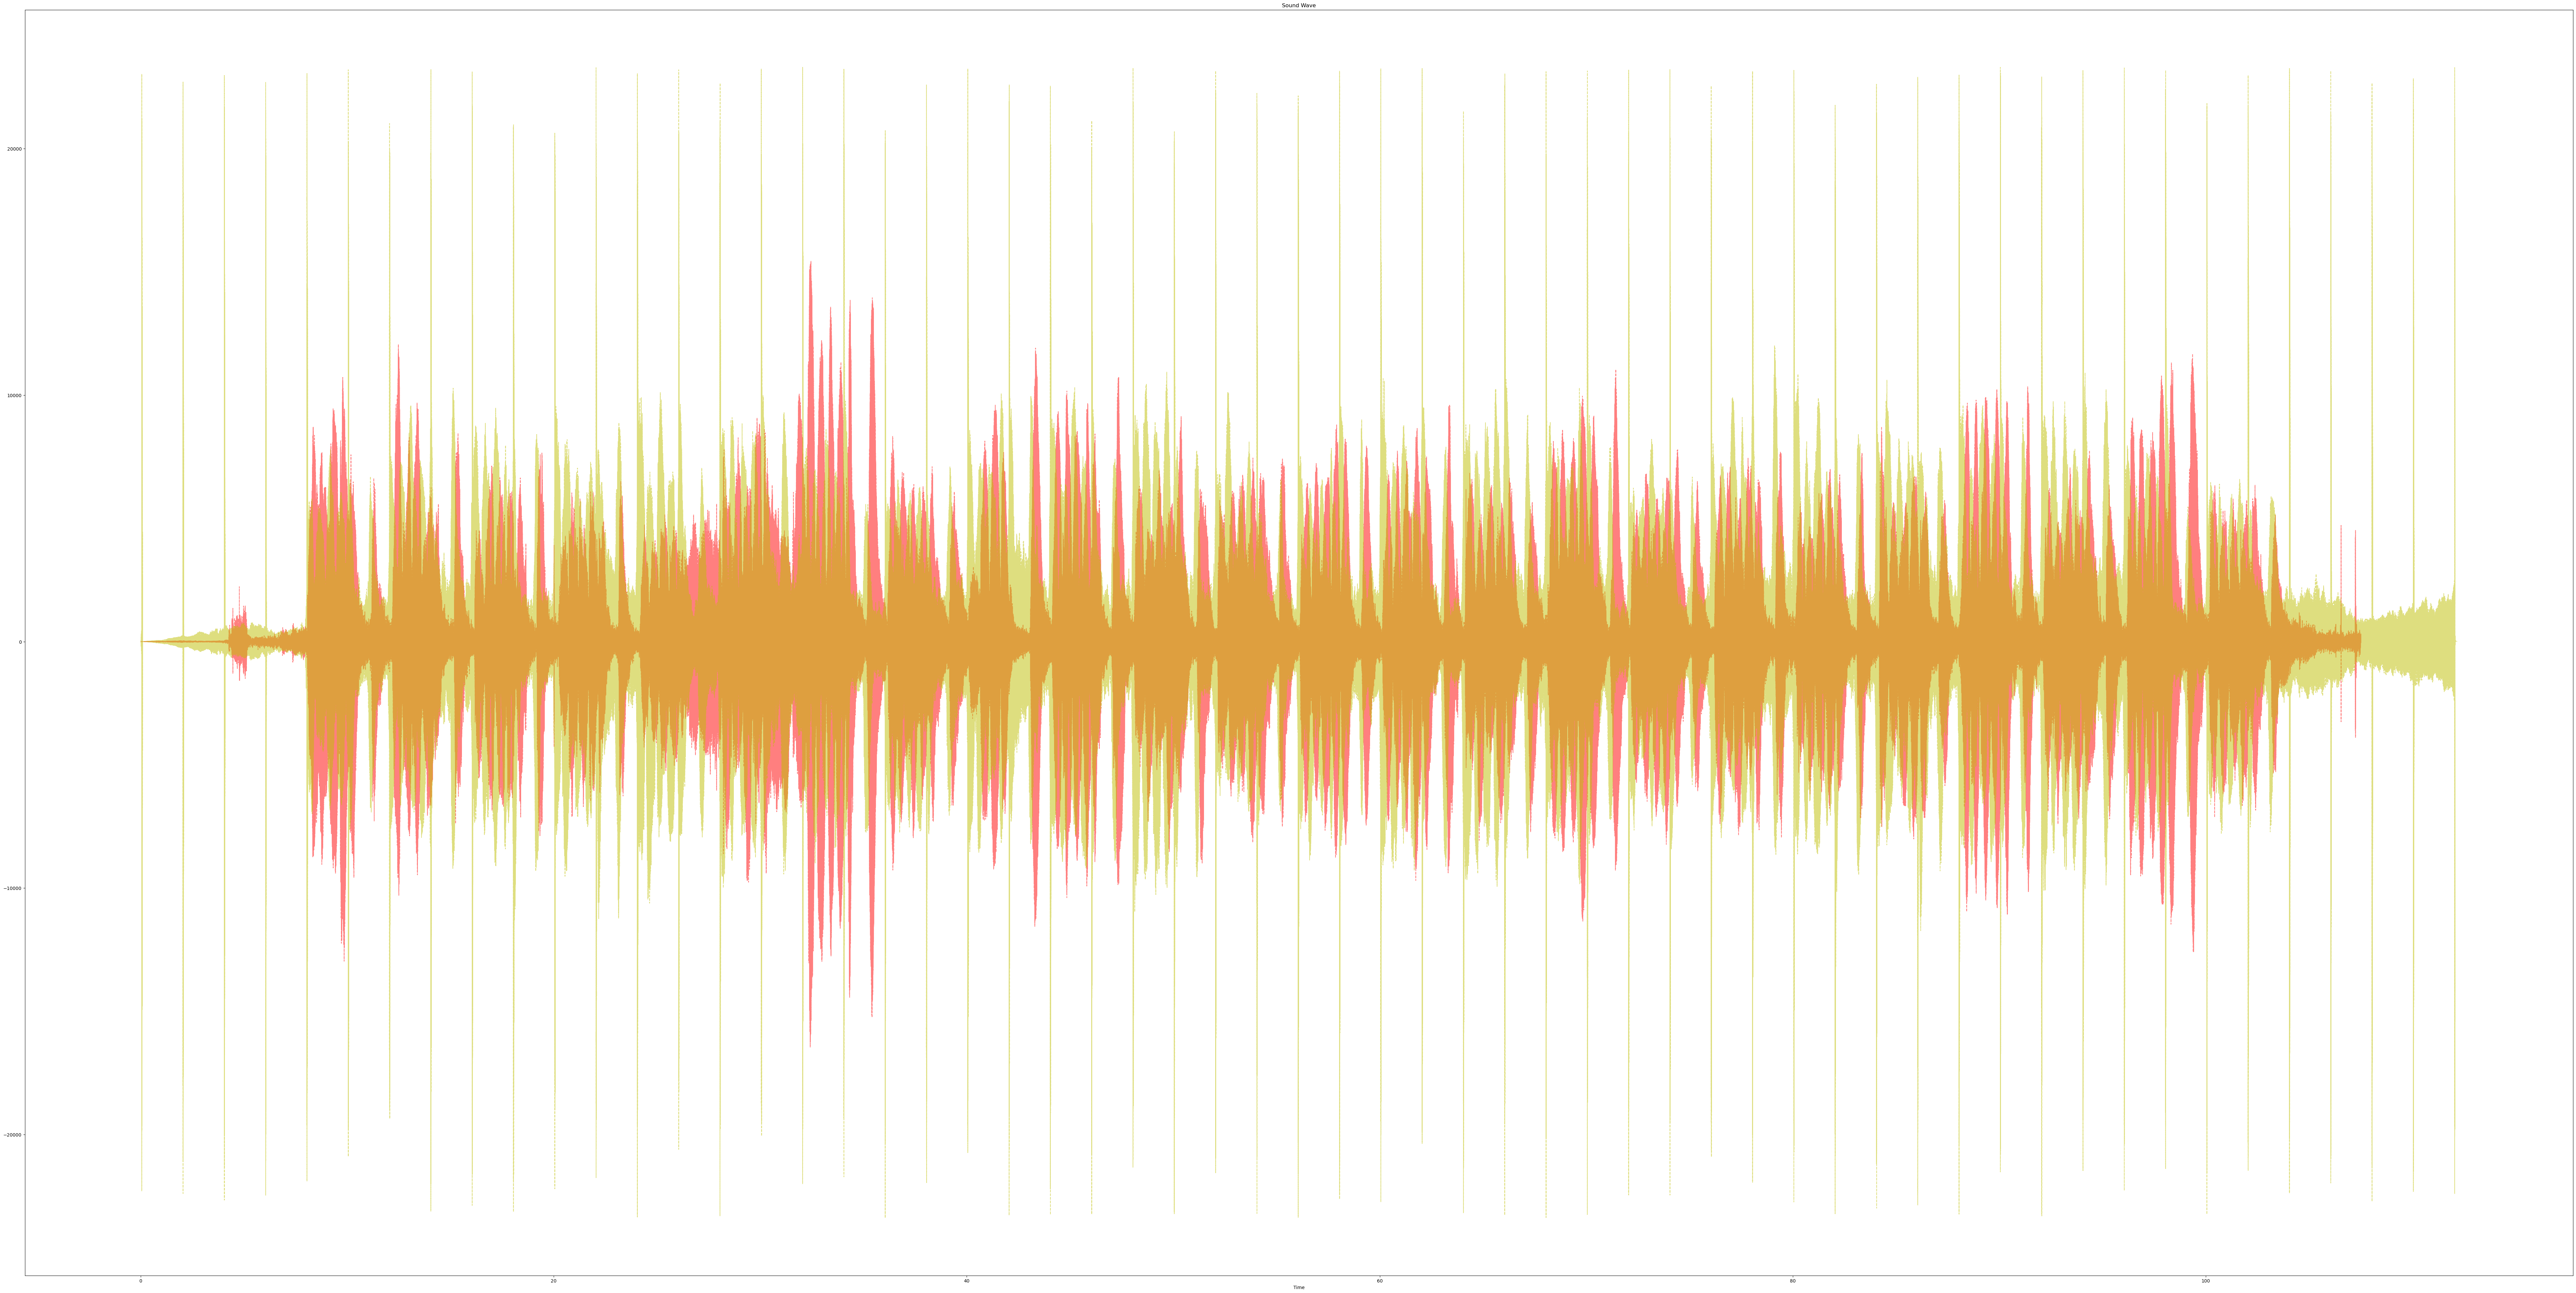

<Figure size 640x480 with 0 Axes>

In [8]:
raw = wave.open('Twinkle Twinkle Little Star.wav','rb')
raw1 = wave.open('Twinkle Twinkle -1 - Ref Track .wav','rb')



print(plt.get_backend())
# reads all the frames
# -1 indicates all or max frames
signal = raw.readframes(-1)
signal = np.frombuffer(signal, dtype ="int16")
signal = np.array(signal)

signal1 = raw1.readframes(-1)
signal1 = np.frombuffer(signal1, dtype ="int16")

# gets the frame rate
f_rate = raw.getframerate()
f_rate1 = raw1.getframerate()

# to Plot the x-axis in seconds
# you need get the frame rate
# and divide by size of your signal
# to create a Time Vector
# spaced linearly with the size
# of the audio file
time = np.linspace(0, len(signal) / f_rate, num = len(signal))

time1 = np.linspace(0,len(signal1) / f_rate1,num = len(signal1))


# using matplotlib to plot
# creates a new figure
plt.figure(figsize=(100, 50))

# title of the plot
plt.title("Sound Wave")

# label of x-axis
plt.xlabel("Time")

# actual plotting
# plt.subplot(211)
plt.plot(time[time >= 0], signal[time >= 0],'--', color='r', label = 'awav', alpha = 0.5)
# plt.subplot(212)
plt.plot(time1[time1 >= 0],signal1[time1 >= 0],'--',color='y', label = 'bwav', alpha = 0.5)



# shows the plot
plt.show()
plt.savefig('abc.png')


In [11]:

from os import path
from pydub import AudioSegment
# files
src = "Twinkle Twinkle Little Star.wav"
dst = "Twinkle Twinkle -1 - Ref Track .wav"

# convert wav to mp3
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

<_io.BufferedRandom name='Twinkle Twinkle -1 - Ref Track .wav'>

In [12]:
print(len(signal))
print(len(signal1))

4741120
4946688


In [14]:
# Load the two audio files
audio1, sr1 = sf.read("Twinkle Twinkle Little Star.wav")
audio2, sr2 = sf.read("Twinkle Twinkle -1 - Ref Track .wav")

min_len = min(len(audio1), len(audio2))
audio1 = audio1[:min_len]
audio2 = audio2[:min_len]

# Extract MFCC features
mfcc1 = mfcc(audio1, samplerate=sr1)
mfcc2 = mfcc(audio2, samplerate=sr2)

# Ensure that both MFCC feature arrays have the same shape
min_shape = min(mfcc1.shape[1], mfcc2.shape[1])
mfcc1 = mfcc1[:, :min_shape]
mfcc2 = mfcc2[:, :min_shape]

# Flatten the MFCCs for similarity calculation
mfcc1_flat = mfcc1.flatten()
mfcc2_flat = mfcc2.flatten()

# Compute cosine similarity between the feature vectors
similarity_score = 1 - cosine(mfcc1_flat, mfcc2_flat)

print("Similarity Score:", similarity_score)


Similarity Score: 1


In [15]:
import librosa
import soundfile as sf
from sklearn.metrics import mean_squared_error
import numpy as np

# Replace 'file1.wav' and 'file2.wav' with the paths to your WAV files
file1 = "0_01_0.wav"
file2 = "2_01_0.wav"

try:
    # Load the WAV files
    y1, sr1 = librosa.load(file1)
    y2, sr2 = librosa.load(file2)

    # Make sure both audio files have the same sample rate
    if sr1 != sr2:
        raise ValueError("Both audio files must have the same sample rate.")

    # Ensure both audio files have the same length
    min_len = min(len(y1), len(y2))
    y1 = y1[:min_len]
    y2 = y2[:min_len]

    # Calculate the mean squared error (MSE) between the two audio signals
    mse = mean_squared_error(y1, y2)

    # Calculate similarity as a percentage (lower MSE indicates higher similarity)
    similarity = 100.0 - (mse * 100)

    print(f"Similarity between {file1} and {file2}: {similarity:.2f}%")
except Exception as e:
    print(f"Error: {str(e)}")


Error: [Errno 2] No such file or directory: '0_01_0.wav'


/var/folders/24/nrnwf4_96k19lt7z9950bs5w0000gn/T/ipykernel_34294/2813285123.py:12: UserWarning: PySoundFile failed. Trying audioread instead.
  y1, sr1 = librosa.load(file1)
/Users/shashankvenkatesha/anaconda3/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [16]:
file1 = "Twinkle Twinkle Little Star.wav"
file2 = "Twinkle Twinkle -1 - Ref Track .wav"

  # Load the audio files.
audio1, sr1 = sf.read(file1)
audio2, sr2 = sf.read(file2)

  # Check that the audio files have the same sample rate.
if sr1 != sr2:
    raise ValueError("The audio files must have the same sample rate.")

  # Calculate the cross-correlation coefficient between the audio files.
cc = np.correlate(audio1, audio2, mode="full")

  # Calculate the similarity as the maximum value of the cross-correlation coefficient.
similarity = np.max(cc)

  # Print the similarity.
print(f"The similarity between the two files is {similarity}%.")

ValueError: object too deep for desired array

In [ ]:
!pip install pydub

In [ ]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment
import soundfile as sf
from sklearn.metrics import mean_squared_error
def read_wave(file_path):
    with wave.open(file_path, 'rb') as wav:
        signal = np.frombuffer(wav.readframes(-1), dtype=np.int16)
        f_rate = wav.getframerate()
        time = np.linspace(0, len(signal) / f_rate, num=len(signal))
    return signal, time

def plot_wave(signal, time, label, color):
    plt.plot(time, signal, color=color, label=label, alpha=0.5)

def calculate_similarity(file1, file2):
    file1 = "Twinkle Twinkle Little Star.wav"
    file2 = "Twinkle Twinkle -1 - Ref Track .wav"

    try:
        # Load the WAV files
        y1, sr1 = librosa.load(file1)
        y2, sr2 = librosa.load(file2)

        # Make sure both audio files have the same sample rate
        if sr1 != sr2:
            raise ValueError("Both audio files must have the same sample rate.")

        # Ensure both audio files have the same length
        min_len = min(len(y1), len(y2))
        y1 = y1[:min_len]
        y2 = y2[:min_len]

        # Calculate the mean squared error (MSE) between the two audio signals
        mse = mean_squared_error(y1, y2)

        # Calculate similarity as a percentage (lower MSE indicates higher similarity)
        similarity = 100.0 - (mse * 100)

        return f"Similarity between {file1} and {file2}: {similarity:.2f}%"
    except Exception as e:
        return f"Error: {str(e)}"
def main():
    raw_signal, raw_time = read_wave('/content/Twinkle Twinkle Little Star.wav')
    raw1_signal, raw1_time = read_wave('/content/Twinkle Twinkle -1 - Ref Track .wav')

    plt.figure(1)
    plt.title("Sound Wave")
    plt.xlabel("Time")

    plot_wave(raw_signal, raw_time, 'awav', 'b')
    plot_wave(raw1_signal, raw1_time, 'bwav', 'g')


    plt.legend()
    plt.savefig('abc.png')
    plt.show()

    print(len(raw_signal))
    print(len(raw1_signal))

    similarity = calculate_similarity("/content/Twinkle Twinkle Little Star.wav", "/content/Twinkle Twinkle -1 - Ref Track .wav")
    print(similarity)

    # Convert WAV to MP3
    src = "/content/Twinkle Twinkle Little Star.wav"
    dst = "/content/Twinkle Twinkle -1 - Ref Track .wava"
    sound = AudioSegment.from_wav(src)
    sound.export(dst, format="wav")

if __name__ == "__main__":
    main()


In [ ]:
a